### Importing Libraries

In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


### Importing warnings 

In [728]:
import warnings
warnings.filterwarnings("ignore")

### Data Preparation

In [729]:
bikedata = pd.read_csv("day.csv")
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [730]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [731]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Dropping the columns that are not required for Analysis

In [732]:
bikedata = bikedata.drop(['instant', 'dteday'], axis = 1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Assigning dummy variables for Seasons 

In [733]:
seasondata = pd.get_dummies(bikedata['season'])
seasondata.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [734]:
seasondata1 = seasondata.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
seasondata1.sample(5)

,spring,summer,fall,winter
30,1,0,0,0
559,0,0,1,0
212,0,0,1,0
689,0,0,0,1
243,0,0,1,0


#### Dropping the 'spring' column as we don't need all the columns of seasons and concatenating 'season' with 'bikedata'

In [735]:
bikedata = pd.concat((bikedata,seasondata1), axis = 1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,winter
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [736]:
bikedata = bikedata.drop(['season', 'spring'], axis = 1)
bikedata.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


#### month column - assigning dummies and dropping January month

In [737]:
monthdata = pd.get_dummies(bikedata['mnth'])
monthdata.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12
71,0,0,1,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,1,0,0,0,0,0,0
170,0,0,0,0,0,1,0,0,0,0,0,0
130,0,0,0,0,1,0,0,0,0,0,0,0
497,0,0,0,0,1,0,0,0,0,0,0,0


In [738]:
monthdata1 = monthdata.rename(columns = { 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', 6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
monthdata1.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
194,0,0,0,0,0,0,1,0,0,0,0,0
461,0,0,0,1,0,0,0,0,0,0,0,0
662,0,0,0,0,0,0,0,0,0,1,0,0
13,1,0,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,1,0,0,0


In [739]:
bikedata = pd.concat((bikedata,monthdata1), axis = 1)
bikedata.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
306,0,11,0,6,0,1,16.741653,20.29605,70.2083,9.166739,...,0,0,0,0,0,0,0,0,1,0
283,0,10,0,4,1,2,23.233347,27.30480,80.8750,9.583814,...,0,0,0,0,0,0,0,1,0,0
460,1,4,0,6,0,1,16.536653,19.53835,37.7083,20.125996,...,0,1,0,0,0,0,0,0,0,0
360,0,12,0,4,1,2,13.325000,16.38165,76.2500,12.626150,...,0,0,0,0,0,0,0,0,0,1
278,0,10,0,6,0,1,20.260847,24.02125,62.0833,9.041918,...,0,0,0,0,0,0,0,1,0,0


In [740]:
bikedata = bikedata.drop(['mnth', 'Jan'], axis = 1)
bikedata.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


#### 'Holiday' :
'1' - holiday and  '0' - not a holiday

#### 'Weekday':
 assigning dummies for weekday

In [741]:
weekdaydata = pd.get_dummies(bikedata['weekday'])
weekdaydata.sample(5)

,0,1,2,3,4,5,6
356,1,0,0,0,0,0,0
696,0,0,0,0,1,0,0
297,0,0,0,0,1,0,0
33,0,0,0,0,0,0,1
411,0,0,0,0,0,0,1


In [742]:
weekdaydata1 = weekdaydata.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)

In [743]:
weekdaydata1.sample(5)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
379,0,0,1,0,0,0,0
418,0,0,0,0,0,0,1
350,0,1,0,0,0,0,0
270,0,0,0,0,0,1,0
87,0,0,0,0,1,0,0


In [744]:
bikedata = pd.concat((bikedata,weekdaydata1),axis = 1)
bikedata.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,1,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,1,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,1,0


#### dropping 'weekday' column and sunday column as the other days are enough

In [745]:
bikedata = bikedata.drop(['weekday','Sunday'],axis=1)
bikedata.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


#### 'workingday':
'1' - not a weekend and also not a holiday
'0' - alternate

#### 'weathersit':
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

now assigning dummies to this

In [746]:
weathersitdata = pd.get_dummies(bikedata['weathersit'])
weathersitdata.sample(5)

,1,2,3
703,1,0,0
159,0,1,0
278,1,0,0
577,1,0,0
74,0,1,0


In [747]:
weathersitdata1 = weathersitdata.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)
weathersitdata1.head()

,Clear,Mist,Light
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [748]:
bikedata = pd.concat((bikedata, weathersitdata1), axis = 1)
bikedata.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
606,1,0,1,1,28.973347,32.63895,59.0417,5.166819,1172,6541,...,0,0,0,0,0,1,0,1,0,0
36,0,0,1,1,11.719153,14.58355,56.8333,9.500600,354,1269,...,0,0,1,0,0,0,0,1,0,0
533,1,0,1,2,23.301653,27.24210,77.7917,11.707982,653,4446,...,0,0,1,0,0,0,0,0,1,0
137,0,0,1,2,22.550000,26.35790,87.0000,13.499964,536,3319,...,0,0,0,0,0,1,0,0,1,0
630,1,0,1,1,21.695847,25.94665,46.7083,14.958286,2454,5453,...,0,1,0,0,0,0,0,1,0,0


#### dropping the column 'weathersit'

In [749]:
bikedata = bikedata.drop('weathersit', axis = 1)
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,1,0,1,0,0


In [750]:
bikedata.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,...,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.634247,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,...,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.481971,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Visualization 

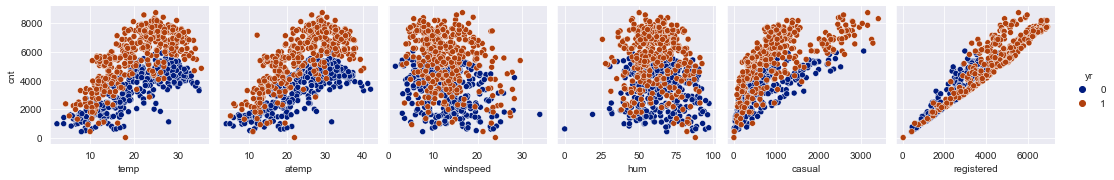

In [751]:
sns.pairplot(bikedata, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'], hue = 'yr', palette='dark')
plt.show()

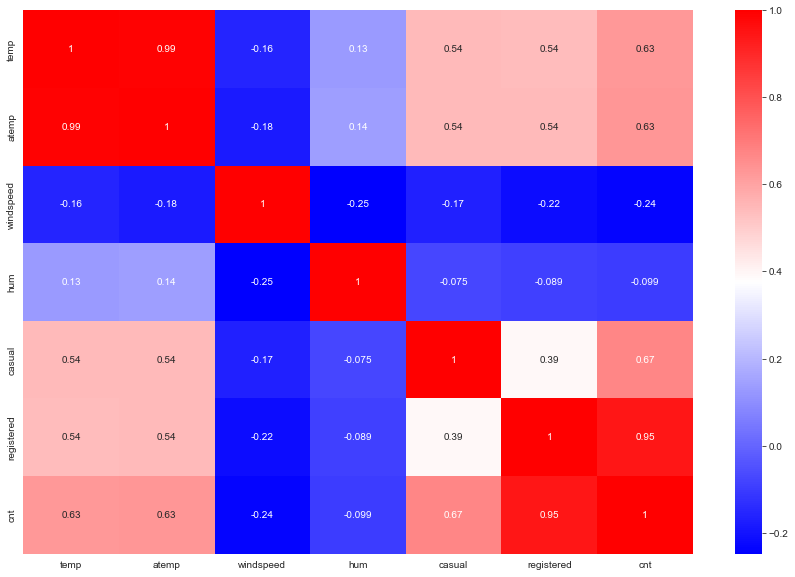

In [752]:
plt.figure(figsize = (15,10))
sns.heatmap(bikedata[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True, cmap="bwr")
plt.show()

#### Observations:

##### Bike User Classification: 
The number of registered bike users surpasses that of casual users, showing a strong correlation with the target variable.

##### Temperature Correlation: 
Both the temperature (Temp) and apparent temperature (atemp) are highly correlated, indicating redundancy; therefore, one can be discarded to streamline the analysis.

##### Humidity Impact: 
Humidity exhibits minimal negative influence on the target variable, suggesting that it may not significantly affect bike usage patterns.

##### Target Feature Ambiguity: 
Determining whether a user is registered or casual occurs only after bike rental. Consequently, both user types serve as target features, posing a challenge in feature selection and modeling.

#### Dropping columns

In [753]:
bikedata = bikedata.drop(['atemp','casual','registered'],axis =1)

In [754]:
bikedata.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

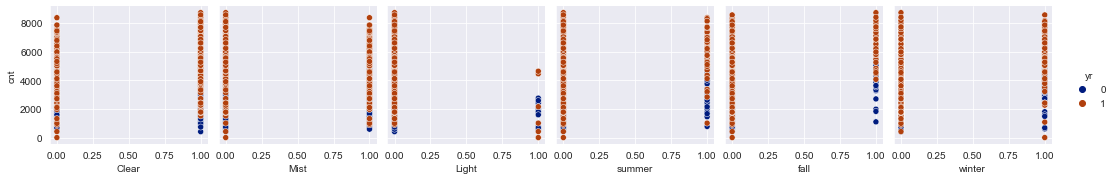

In [755]:
sns.pairplot(bikedata,x_vars =['Clear', 'Mist','Light','summer','fall','winter'],y_vars='cnt',hue ='yr', palette='dark')
plt.show()

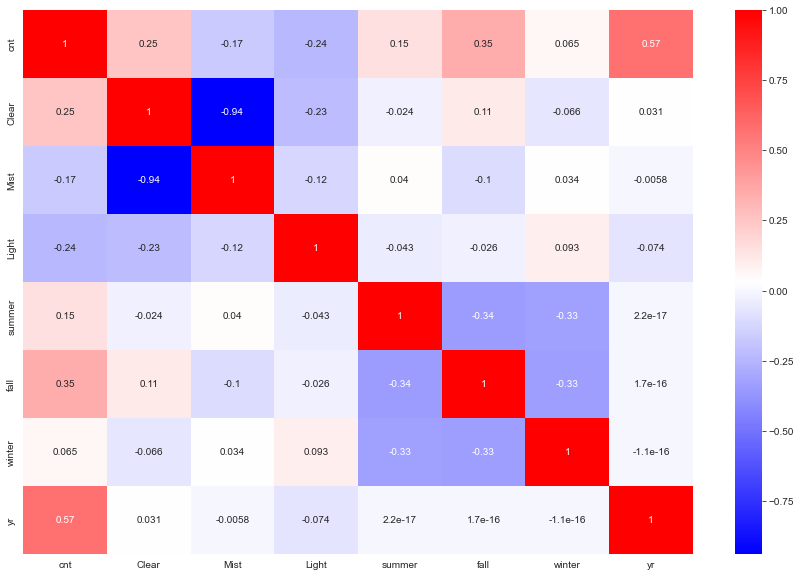

In [756]:
plt.figure(figsize = (15,10))
sns.heatmap(bikedata[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True, cmap='bwr')
plt.show()

In [757]:
bikedata.groupby(['summer','fall','winter','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

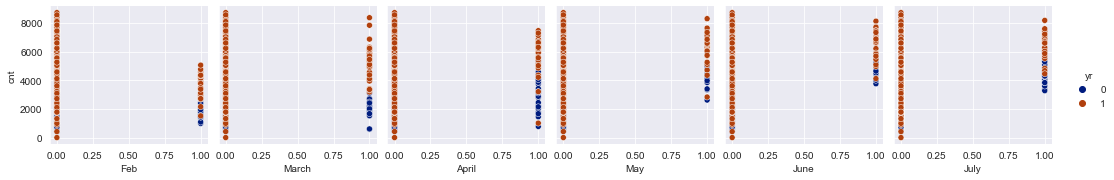

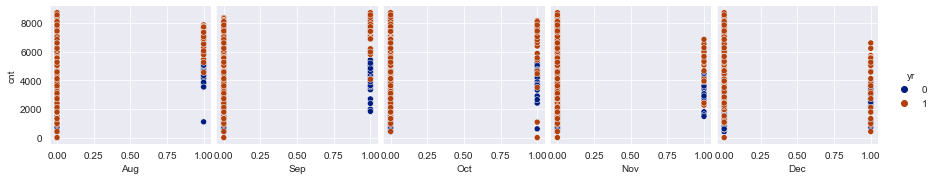

In [758]:

sns.pairplot(bikedata,x_vars =['Feb','March','April','May','June','July'],y_vars='cnt',hue ='yr',palette='dark')
sns.pairplot(bikedata,x_vars =['Aug','Sep','Oct','Nov','Dec'],y_vars='cnt',hue ='yr',palette='dark')
plt.show()

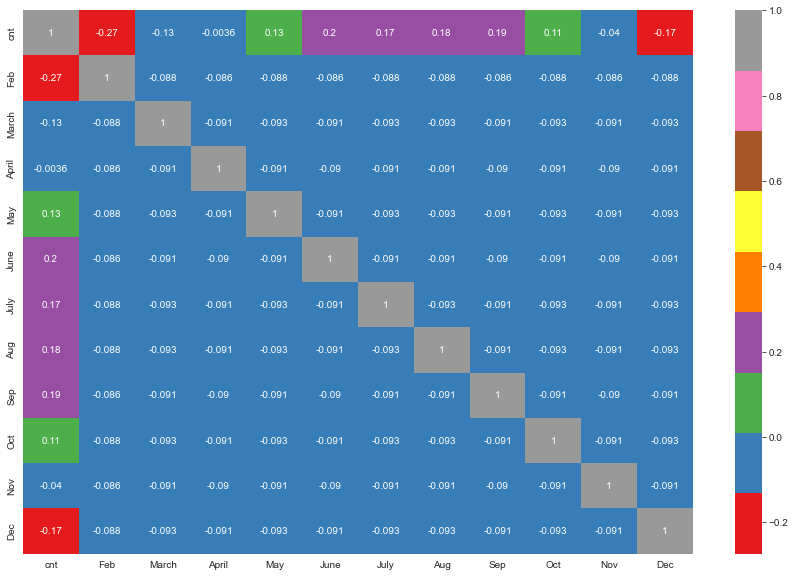

In [759]:
plt.figure(figsize = (15,10))
sns.heatmap(bikedata[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True, cmap='Set1')
plt.show()

#### Insights
##### Peak Bike Rentals: 
The highest number of bike rentals occurred in September 2019. Interestingly, the previous year's peak fell in June.

##### Seasonal Demand: 
Notably, demand for bike rentals tends to surge during the winter season. This trend suggests that BOOM Bikes can anticipate heightened demand during colder months.

In [760]:
bikedata.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
1        0           0       1     0         5707.750000
0        1           0       1     0         5661.906977
         0           0       1     0         5598.400000
                     1       0     0         5280.392157
                     0       0     1         4982.106383
1        0           1       0     0         4909.250000
0        1           1       0     0         4881.023256
                     0       0     1         4666.416000
1        0           0       0     1         4025.333333
0        0           0       0     0         2827.903846
         1           0       0     0         2567.338843
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

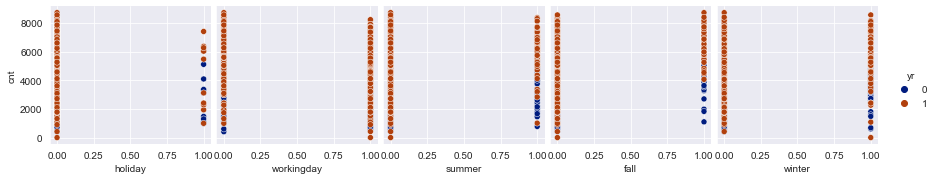

In [761]:
sns.pairplot(bikedata,x_vars =['holiday', 'workingday','summer','fall','winter'],y_vars='cnt',hue ='yr', palette='dark')
plt.show()

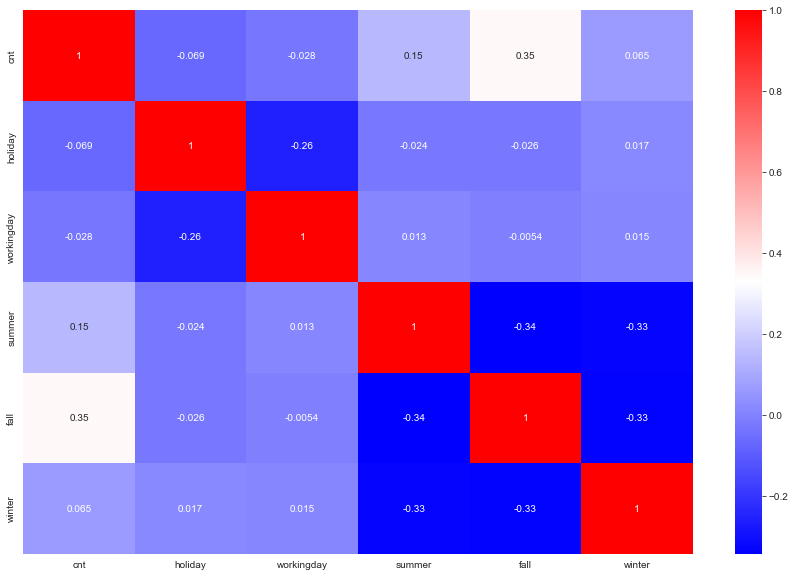

In [762]:
plt.figure(figsize = (15,10))
sns.heatmap(bikedata[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True, cmap='bwr')
plt.show()

### Data Modelling 

#### Data Splitting

In [763]:
training,testing = train_test_split(bikedata,train_size=0.7,random_state=100)
print(training.shape)
print(testing.shape)

(510, 30)
(220, 30)


In [764]:
#scaling since data is uniform.
scaler = MinMaxScaler()

num_vars = ['temp', 'windspeed',"hum",'cnt']

training[num_vars]=scaler.fit_transform(training[num_vars])


training.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.711765,0.453386,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


In [765]:
#preparing training dataset
y_train = training.pop('cnt')
X_train = training
print(X_train.shape)
y_train.sample(5)

(510, 29)


286    0.416705
333    0.413139
581    0.626093
596    0.748734
242    0.579383
Name: cnt, dtype: float64

#### Recursive Feature Elimination 

In [766]:
# RFE with Output var=15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [767]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 5),
 ('March', True, 1),
 ('April', False, 3),
 ('May', False, 2),
 ('June', False, 4),
 ('July', False, 6),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 7),
 ('Dec', False, 8),
 ('Monday', False, 15),
 ('Tuesday', False, 14),
 ('Wednesday', False, 11),
 ('Thrusday', False, 9),
 ('Friday', False, 10),
 ('Saturday', False, 13),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [768]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'March', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [769]:
X_train.columns[~(rfe.support_)]

Index(['workingday', 'Feb', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday'],
      dtype='object')

#### Model with detailed statistics

In [770]:
X_train_rfe = X_train[col]

In [771]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.46e-189
Time:                        18:20:35   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0994      0.024      4.093      0.000       0.052       0.147
yr             0.2298      0.008     28.366      0.000       0.214       0.246
holiday       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp           0.4965      0.034     14.604      0.000       0.430       0.563
hum           -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed     -0.1858      0.026     -7.234      0.000      -0.236      -0.135
summer         0.1225      0.015      8.137      0.000       0.093       0.152
fall           0.0361      0.023      1.593      0.112      -0.008       0.081
winter         0.1502      0.014     10.671      0.000       0.123       0.178
March          0.0279      0.014      1.931      0.054      -0.000       0.056
Aug            0.0505      0.018      2.883      0.004       0.016       0.085
Sep            0.1202      0.017      6.946      0.000       0.086       0.154
Oct            0.0393      0.018      2.231      0.026       0.005       0.074
Clear          0.1329      0.008     15.721      0.000       0.116       0.149
Mist           0.0785      0.011      6.994      0.000       0.056       0.101
Light         -0.1120      0.022     -5.121      0.000      -0.155      -0.069
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                     2.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [772]:
#Dropping column with higher P-value
X_train_rfe = X_train_rfe.drop('fall',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'March', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [773]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          5.94e-190
Time:                        18:20:35   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.024      4.163      0.000       0.053       0.149
yr             0.2287      0.008     28.289      0.000       0.213       0.245
holiday       -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp           0.5371      0.023     23.855      0.000       0.493       0.581
hum           -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed     -0.1893      0.026     -7.388      0.000      -0.240      -0.139
summer         0.1059      0.011      9.743      0.000       0.085       0.127
winter         0.1393      0.012     11.304      0.000       0.115       0.163
March          0.0233      0.014      1.642      0.101      -0.005       0.051
Aug            0.0605      0.016      3.699      0.000       0.028       0.093
Sep            0.1292      0.016      7.897      0.000       0.097       0.161
Oct            0.0355      0.017      2.032      0.043       0.001       0.070
Clear          0.1315      0.008     15.616      0.000       0.115       0.148
Mist           0.0783      0.011      6.961      0.000       0.056       0.100
Light         -0.1086      0.022     -4.981      0.000      -0.151      -0.066
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                     2.60e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [774]:
#Dropping columns with higher p-value
X_train_rfe = X_train_rfe.drop('March',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [775]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.49e-190
Time:                        18:20:35   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1064      0.024      4.411      0.000       0.059       0.154
yr             0.2289      0.008     28.264      0.000       0.213       0.245
holiday       -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp           0.5316      0.022     23.836      0.000       0.488       0.575
hum           -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed     -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer         0.1058      0.011      9.719      0.000       0.084       0.127
winter         0.1353      0.012     11.180      0.000       0.112       0.159
Aug            0.0585      0.016      3.583      0.000       0.026       0.091
Sep            0.1277      0.016      7.803      0.000       0.096       0.160
Oct            0.0358      0.018      2.046      0.041       0.001       0.070
Clear          0.1327      0.008     15.787      0.000       0.116       0.149
Mist           0.0795      0.011      7.081      0.000       0.057       0.102
Light         -0.1058      0.022     -4.859      0.000      -0.149      -0.063
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                     2.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [776]:
# VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,Clear,inf
12,Mist,inf
13,Light,inf
4,hum,1.86
7,winter,1.71
3,temp,1.59
10,Oct,1.48
8,Aug,1.45
6,summer,1.38
9,Sep,1.24


In [777]:
#Dropping columns with insignificant VIF
X_train_rfe = X_train_rfe.drop(['Clear'],axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Mist', 'Light'],
      dtype='object')

In [778]:
# Adding constant
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.49e-190
Time:                        18:20:35   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.027      8.838      0.000       0.186       0.292
yr             0.2289      0.008     28.264      0.000       0.213       0.245
holiday       -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp           0.5316      0.022     23.836      0.000       0.488       0.575
hum           -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed     -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer         0.1058      0.011      9.719      0.000       0.084       0.127
winter         0.1353      0.012     11.180      0.000       0.112       0.159
Aug            0.0585      0.016      3.583      0.000       0.026       0.091
Sep            0.1277      0.016      7.803      0.000       0.096       0.160
Oct            0.0358      0.018      2.046      0.041       0.001       0.070
Mist          -0.0531      0.010     -5.073      0.000      -0.074      -0.033
Light         -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking VIF Score

In [779]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,45.88
4,hum,1.86
7,winter,1.71
3,temp,1.59
11,Mist,1.55
10,Oct,1.48
8,Aug,1.45
6,summer,1.38
9,Sep,1.24
12,Light,1.24


#### Residual Analysis

In [780]:
# error calculation in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

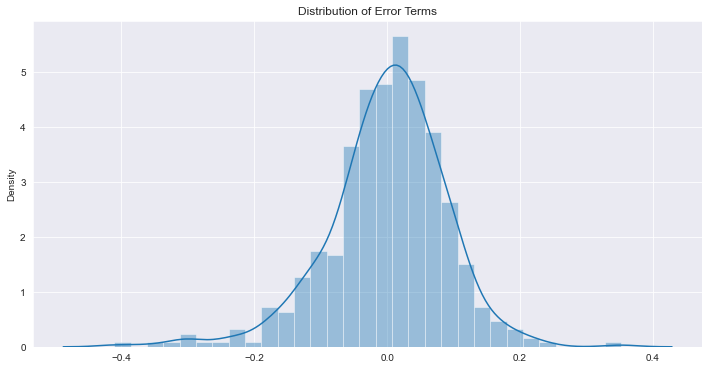

In [781]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

##### The observation reveals that the error terms exhibit a normal distribution centered around zero. Consequently, the model aligns with the assumption of normality, as the errors conform to this expected distribution pattern. 

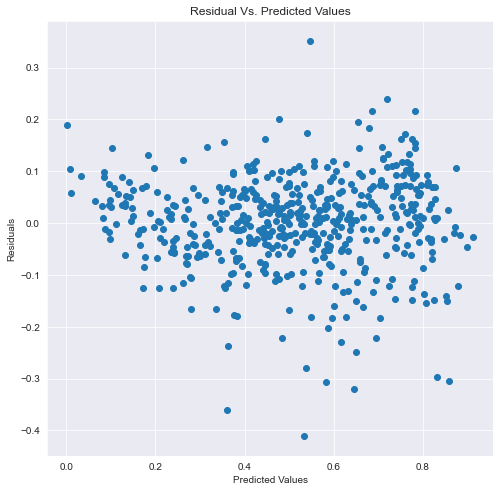

In [782]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

##### there is no pattern which means error terms are independent

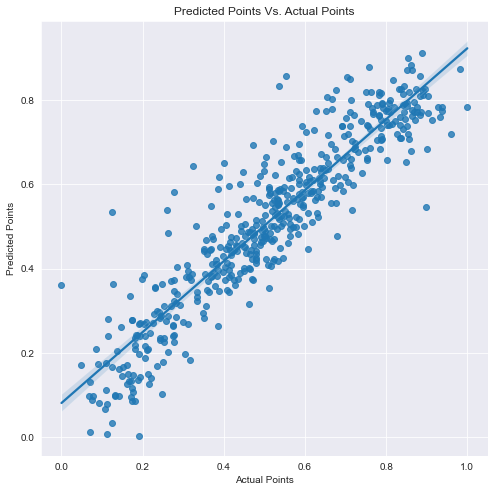

In [783]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### Model Evaluation 

In [784]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

testing[num_vars]=scaler.transform(testing[num_vars])

y_test = testing.pop('cnt')
X_test = testing
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,0,0,1,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,1,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,0,0,1,0,1,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [785]:
#Dropping the Features  eliminated during Training Process
X_test_sm = X_test_sm[X_train_sm.columns]

# Predicting the Price for Test Data
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

448    0.534527
153    0.565341
558    0.753790
630    0.882079
272    0.649349
dtype: float64

#### Actual vs Predicted Rent of Bikes Count

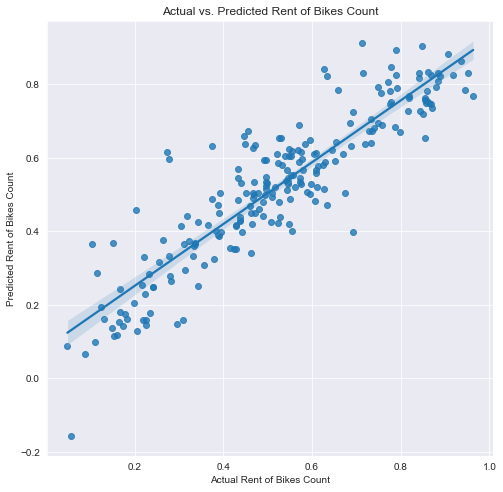

In [786]:
plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

### r2_Score

In [787]:
# r2_score 
r2_score(y_test, y_test_pred)

0.8116537323246353

#### Checking the correlations between the final predictor variables

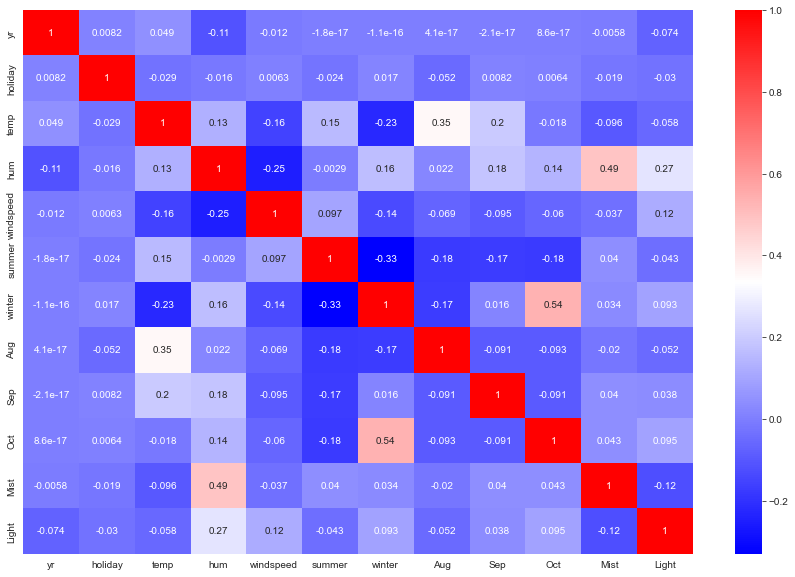

In [788]:
corr_col = X_train_sm.columns.tolist()
corr_col.remove('const')
plt.figure(figsize=(15, 10))
sns.heatmap(bikedata[corr_col].corr(), annot=True, cmap='bwr')
plt.show()

### Insights
Temperature Impact: Temperature emerges as the most influential factor positively impacting business operations.

Negative Influence of Environmental Conditions: Conversely, adverse environmental factors such as rain, humidity, windspeed, and cloudy skies exert a detrimental effect on business metrics.

Weather Mitigation Strategies: The company must devise strategies to mitigate the impact of inclement weather conditions and devise solutions to shield users from rain, ensuring a seamless biking experience.

Seasonal Demand Variations: Bike demand peaks during winter and summer seasons, with users showing reluctance to bike during rainy weather or the rainy season.

Weekend Rental Trends: Notably, Saturday witnesses a surge in bike rentals compared to other typical days, signifying a distinct rental pattern among customers.

Growth Trends: The demand for bike rentals witnessed a significant increase in 2019 compared to 2018, indicating the successful growth trajectory of Boom Bikes as a business entity.